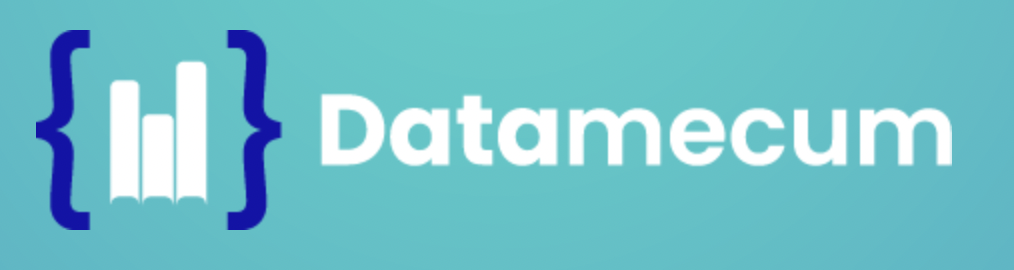
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Aprendizaje no supervisado.</h2></font> 
#### José María Martínez Martínez

# K-Means Clustering en Python

## Instalación de dependencias


Primero instala las dependencias (`requirements.txt`)

In [1]:
! python3 -m pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.3 MB/s 
     |████████████████████████████████| 121 kB 10.5 MB/s 
     |████████████████████████████████| 1.6 MB 37.8 MB/s 
     |████████████████████████████████| 83 kB 595 kB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=12dfc96a2cf0c095e4d2ae7c25e33f5b87fdeab8e05b18b26b6034113ba1719d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import sklearn

sklearn.__version__

'1.0.2'

## Creación del conjunto de datos sintético
Lo primero que vamos a hacer es crear una función para generar datos sintéticos aletorios. Debes rellenar el siguiente código. Para ello, crea 2 nubes de puntos de 3 dimensiones (una para casa clase). La primera nube (800 puntos) que provenga de una distribución normal con media 0 y desviación estándar 0. La segunda nube de puntos (500 puntos), que sea igual que la primera pero que la última componente tenga media 4 y desviación estándar 0.5. Debes crear un vector de salida con valor 0 para la primera nube de puntos y 1 para la segunda. 

In [3]:
from google.colab import output
output.enable_custom_widget_manager()
# to interacte  with plot
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(output_dim=3, num_examples=[800, 500]):
    features_class_1 = np.random.randn(num_examples[0], output_dim)
    features_class_2 = np.random.randn(num_examples[1], output_dim)
    features_class_2[:, 2] = np.random.randn(num_examples[1]) * 0.5 + 4
    labels_class_1 = np.ones([num_examples[0], 1])
    labels_class_2 = np.zeros([num_examples[1], 1])
    x = np.concatenate((features_class_1, features_class_2), axis=0)
    y = np.concatenate((labels_class_1, labels_class_2), axis=0)
    return (x, y)

Ahora vamos a llamar a la función anterior para generar nuestro conjunto de datos:

In [4]:
np.random.seed(1)
num_examples = [500,800]
output_dim = 3
x, y = generate_dataset(num_examples=num_examples, output_dim=output_dim)


A continuación, representa los datos en 3D, con diferentes colores para representar la pertenencia a cada una de las clases:

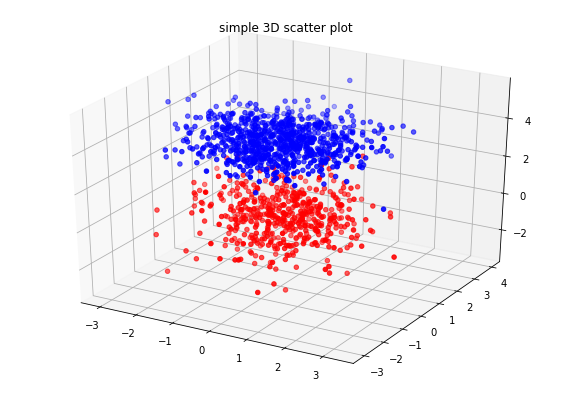

In [8]:
# Creating figure
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
# Creating plot
ax.scatter3D(x[(y == 0).flatten(), 0], x[(y == 0).flatten(), 1], x[(y == 0).flatten(), 2], color="blue")
ax.scatter3D(x[(y == 1).flatten(), 0], x[(y == 1).flatten(), 1], x[(y == 1).flatten(), 2], color="red")
plt.title("simple 3D scatter plot")
# show plot
plt.show()

Ahora vamos a crear otro conjunto de datos pero de una manera menos artesal, de más alto nivel, usando la función "make_blobs" de la librería sklearn (módulo `sklearn.datasets`). En este caso genera tres nubes de puntos de 800, 500 y 300 puntos de 3 dimensiones cuyos centros estén ubicados en las coordenadas [0, 0, 0],  [0, 0, 6] y [6, 2, 4]. La desviación estandar del primer y tercer conjunto debe de ser de 1 y la del segundo de 0.85

In [22]:
from sklearn.datasets import make_blobs
features, true_labels = make_blobs(
    n_samples=[800, 500, 300], n_features=3, centers=[[0, 0, 0], [0, 0, 6], [6, 2, 4]], cluster_std=[1, 0.85, 1], random_state=42
)

A continuación, representa los datos en 3D, con diferentes colores para representar la pertenencia a cada una de las clases:

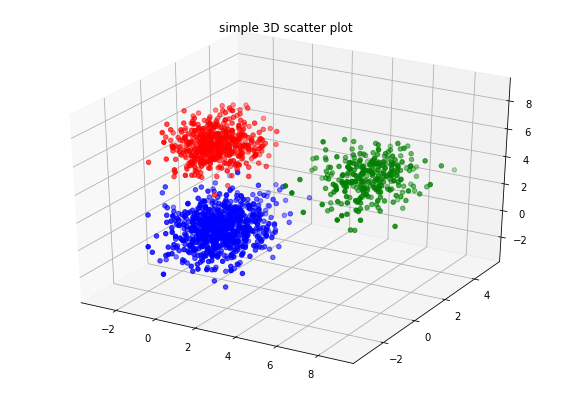

In [23]:
# Creating figure
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
# Creating plot
ax.scatter3D(features[(true_labels == 0), 0], features[(true_labels == 0), 1], features[(true_labels == 0), 2], color="blue")
ax.scatter3D(features[(true_labels == 1), 0], features[(true_labels == 1), 1], features[(true_labels == 1), 2], color="red")
ax.scatter3D(features[(true_labels == 2), 0], features[(true_labels == 2), 1], features[(true_labels == 2), 2], color="green")

plt.title("simple 3D scatter plot")
# show plot
plt.show()

Muestra las últimas 5 muestras del conjunto de datos

In [24]:
features[-5:,:]

array([[-1.30144138,  0.43711654,  6.48624883],
       [ 6.76084665,  2.06008599,  4.38831201],
       [-0.39368716, -0.34971262,  6.98081562],
       [-1.12905177, -0.52452027,  0.48937456],
       [-0.47917424, -0.18565898, -1.10633497]])

Muestra las últimas 5 etiquetas del conjunto de datos

In [25]:
true_labels[-5:]

array([1, 2, 1, 0, 0])

Estandariza las variables para que tengan media cero y desviación estándar 1. Para ello utiliza la función `StandardScaler` del módulo `sklearn.preprocessing`.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


 Calcula ahora los valores estandarizados pero de manera "manual" y comprueba de manera analítica que los resultados son los mismos que los obtenidos anteriormente.

In [27]:
manual_scaled_features = (features-np.mean(features, 0))/np.std(features, 0)
np.array_equal(scaled_features, manual_scaled_features)


True

Muestra las últimas 5 muestras normalizadas con el método `StandardScaler` del conjunto de datos

In [29]:
scaled_features[-5:,:]

array([[-0.98061752,  0.06901837,  1.32279796],
       [ 2.2881843 ,  1.39465901,  0.59555752],
       [-0.61257453, -0.57366329,  1.49423733],
       [-0.91072329, -0.7164461 , -0.75599176],
       [-0.6472347 , -0.43966436, -1.30913735]])

Muestra las últimas 5 muestras normalizadas con el método "manual" del conjunto de datos y comprueba visualmente que son iguales

In [28]:
manual_scaled_features[-5:,:]

array([[-0.98061752,  0.06901837,  1.32279796],
       [ 2.2881843 ,  1.39465901,  0.59555752],
       [-0.61257453, -0.57366329,  1.49423733],
       [-0.91072329, -0.7164461 , -0.75599176],
       [-0.6472347 , -0.43966436, -1.30913735]])

Entrena el algoritmo de clustering kmeans con el módulo `cluster` del paquete `sklearn`. Haz el ajuste para un número de cluters igual a 3 y varía el resto de parámetros para ver las diferencias en los resultados

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42
)

In [32]:
kmeans.fit(scaled_features)

Imprime por pantalla la suma de los residuos al cuadrado devuelta por el algoritmo tras el entrenamiento (a través de un atributo)

In [33]:
# Suma de los residuos al cuadrado (Sum of Square Error)
kmeans.inertia_

1381.7524570731757

Imprime por pantalla las posiciones finales de los centroides devuelta por el algoritmo tras el entrenamiento (a través de un atributo)

In [34]:
# Posiciones finales de los centroides
kmeans.cluster_centers_

array([[ 1.92088966,  1.32083203,  0.47060605],
       [-0.42260973, -0.30818942, -0.91716525],
       [-0.46654488, -0.29303164,  1.16978238]])

Imprime por pantalla el número de iteraciones que ha necesitado el algoritmo para converger.

In [35]:
# The number of iterations required to converge
kmeans.n_iter_

9

Imprime por pantalla las etiquetas de las últimas 5 muestras devuelta por el algoritmo.

In [37]:
kmeans.labels_[-5:]

array([2, 0, 2, 1, 1], dtype=int32)

Representa los datos en el espacio original junto con los centroides calculados por el algoritmo de clustering. Representa mediante distintos colores la pertenencia a cada uno de los clusters (resultado o salida del algoritmo de clustering)



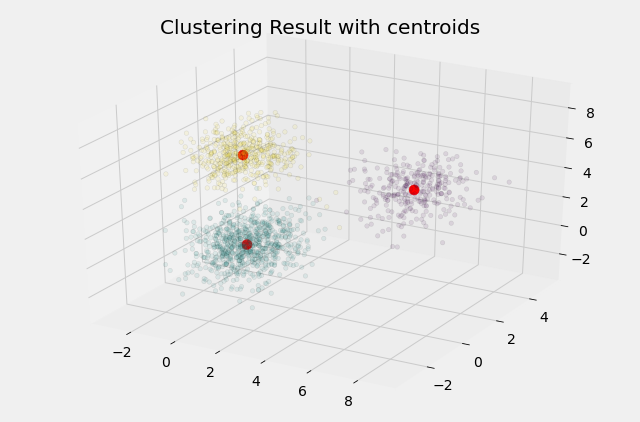

array([2.46643525, 1.22429066, 2.88479119])

In [ ]:
denormalized_centers = scaler.inverse_transform(kmeans.cluster_centers_)
# Creating figure
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
# Creating plot
ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=kmeans.labels_.astype(float), edgecolor="k", alpha=0.1)
ax.scatter(denormalized_centers[:, 0], denormalized_centers[:, 1], denormalized_centers[:, 2], c="r", s=100, alpha=1)

plt.title("Clustering Result with centroids")
# show plot
plt.show()
np.mean(features, axis=0)
np.std(features, axis=0)

Varía el número de clusters de 2 a 4 y ejecuta las celdas anteriores para visualizar y comparar resultados

### Selección del número adecuado de clusters

En el ejercicio anterior, le hemos dicho al algoritmo de clustering mediante un parámetro que queríamos encontrar 3 grupos. En este caso conocíamos que ese era el número correcto debido a que nosotros mismos hemos generado el conjunto de datos. En la realidad los datos vienen dados y no sabemos a priori cuál es el número correcto de agrupaciones. En esta sección veremos dos métodos que se utilizan habitualmente para selecciónar de manera analítica el número adecuado de clusters:


*   El "Elbow method"
*   El coeficiente "silhouette"

A menudo se utilizan como técnicas de evaluación complementarias, en lugar de preferir una sobre la otra. 


A continuación crea un diccionario donde las "keys" sean los nombres de los parámetros del algoritmo de clustering y donde los "values" sean los valores de dichos parámetros.

In [39]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}


A continuación ejecuta varios k-means, incrementa el número de clusters con cada iteración y registra el "SEE". Para ello crea un bucle en el que se ajustará el algoritmo kmean variando el número de clusters entre 1 y 11. Utiliza el diccionario creado anteriormente como entrada a la función para determinar los parámetros de entrada (excepto el número de clusters). Además, guarda en una lista vacía la suma de los residuos al cuadrado (SSE) para tener una traza del error para cada opción.

In [40]:

# A list holds the SSE values for each k
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

A continuación representa en una gráfica error calculado anteriormente (suma de los residuos al cuadrado) frente al número de clusters.

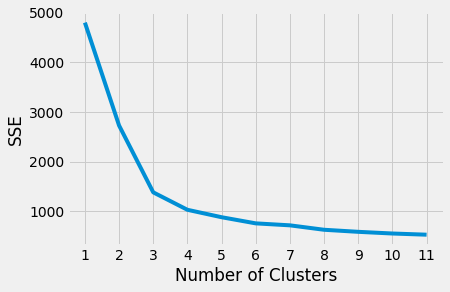

In [41]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 12), sse)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Al representar el SSE frente al número de clusters, se observa que el SSE disminuye a medida que aumenta el número de clusters. A medida que se añaden más centroides, la distancia de cada punto a su centroide más cercano disminuirá. Existe un punto óptimo en el que la curva SSE empieza a curvarse, conocido como punto codo. Se cree que el valor x de este punto es un compromiso razonable entre el error y el número de clusters. En este ejemplo, el codo se sitúa en x=3:

A continuación utiliza el algoritmo "kneedle" publicado [aquí](https://raghavan.usc.edu//papers/kneedle-simplex11.pdf). Dado un conjunto de valores x e y, dicho algoritmo devolverá el "punto de rodilla" (knee point en inglés) de la función. El "punto de rodilla" el el punto de máxima curvatura. Para ello, usaremos el módulo `KneeLocator` de la librería `kneed`. Para más info, ir al [este repositorio](https://github.com/arvkevi/kneed).

In [42]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 12), sse, curve="convex", direction="decreasing")

A continuación imprime por pantalla el "codo" calculado por el algorimto y comprueba que el valor se corresponde con el mencionado anteriormente (3).

In [ ]:
kl.elbow

3

El coeficiente "silhouette"  es una medida de la cohesión y separación de los clusters. Cuantifica lo bien que se ajusta un dato en el cluster asignado en función de dos factores:

1.   la proximidad del dato  a otros puntos del cluster
2.   La distancia entre el dato y los datos de otros clusters.

Los valores del coeficiente "silhouette" oscilan entre -1 y 1. Valores altos indican que las muestras están más cerca de sus clústeres que de otros clústeres.

En la implementación scikit-learn del coeficiente "silhouette", el valor medio de dicho coeficiente para todas las muestras se resume en una puntuación. La función `silhouette_score` necesita un mínimo de dos clusters, o lanzará una excepción.

Vuelve a recorrer los valores del número de clusters (ahora entre 2 y 11). Esta vez, en lugar de calcular el SSE, calcule el coeficiente "silhouette" y guardalos en una lista vacía como has hecho anteriormente:

In [44]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

A continuación dibuja en una gráfica cómo varía el coeficiente "Silhouette" según incrementamos el número de clusters:

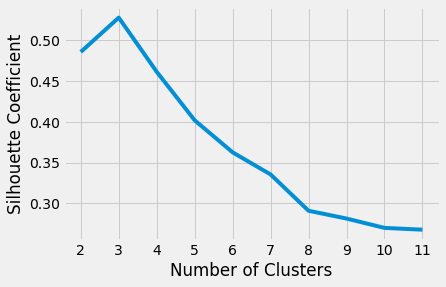

In [47]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Utilizando el código anterior, entrena el algoritmo de kmeans variando el número de clusters (entre 2 y 11) y calcula tanto el score de davies boulding como el coeficiente "Silhouette" (almacénalos en dos listas vacías). El score de davies boulding puedes utilizarlo a través de la función `davies_boulding_score` del módulo `sklearn.metrics`. A continuación representa ambos índices en la misma gráfica frente al número de clusters. Para ello utiliza una leyenda, para identificar cada uno de los índices en el gráfico.

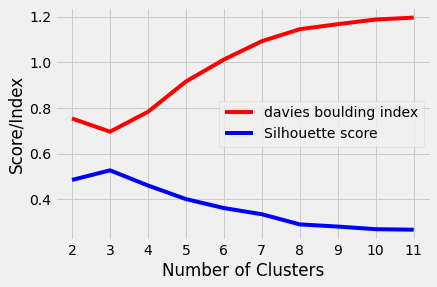

In [46]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
 

silhouette_coefficients = []
davies_bouldin_scores = []
# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sil_score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(sil_score)
    db_score = davies_bouldin_score(scaled_features, kmeans.labels_)
    davies_bouldin_scores.append(db_score)
 

plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), davies_bouldin_scores, color='red', label = 'davies boulding index')
plt.plot(range(2, 12), silhouette_coefficients, color='blue', label = 'Silhouette score')
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Score/Index")
plt.legend()
plt.show()
